In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
model = models.densenet161(pretrained=True)
time1 = time.time()
print(model)


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /home/austinguish/.cache/torch/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:10<00:00, 10.9MB/s] 


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [2]:
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Linear(2208,6)
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

transfer_Densenet161_Adam
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.1708, Accuracy: 62.7828%,Valid: Loss: 0.7891, Accuracy: 75.3049%,Time: 12.3621s
Epoch: 2
Epoch: 002, Training: Loss: 0.6092, Accuracy: 84.2195%,Valid: Loss: 0.5754, Accuracy: 81.7073%,Time: 11.6977s
Epoch: 3
Epoch: 003, Training: Loss: 0.4663, Accuracy: 87.3869%,Valid: Loss: 0.4643, Accuracy: 85.9756%,Time: 11.6786s
Epoch: 4
Epoch: 004, Training: Loss: 0.3779, Accuracy: 90.1584%,Valid: Loss: 0.4196, Accuracy: 88.7195%,Time: 11.5478s
Epoch: 5
Epoch: 005, Training: Loss: 0.3295, Accuracy: 91.4593%,Valid: Loss: 0.3997, Accuracy: 88.1098%,Time: 12.1212s
Epoch: 6
Epoch: 006, Training: Loss: 0.2873, Accuracy: 91.4593%,Valid: Loss: 0.3564, Accuracy: 90.2439%,Time: 11.6803s
Epoch: 7
Epoch: 007, Training: Loss: 0.2504, Accuracy: 93.8914%,Valid: Loss: 0.3404, Accuracy: 90.2439%,Time: 11.7120s
Epoch: 8
Epoch: 008, Training: Loss: 0.2265, Accuracy: 94.1742%,Valid: Loss: 0.3549, Accuracy: 90.8537%,Time: 11.4632s
Epoch: 9
Epoc

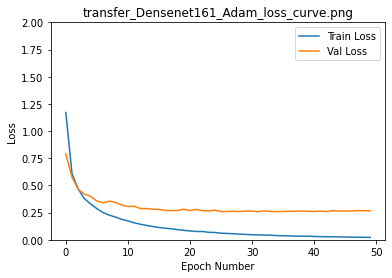

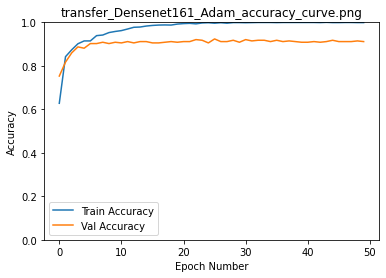

608.1010339260101


In [3]:
device = 7
model_name_list = ["transfer_Densenet161"]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
file_name = model_name_list[0]+'_'+"Adam"
print(file_name)
optimizer = optim.Adam(model.parameters())
trainmodel(model_name=model,loss = lossfunc,batchsize=36,opti=optimizer,\
           epoch_num=50,device_num=device,filename=file_name)
time2 = time.time()
print(time2-time1)